In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

C:\Users\Joy\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#pip install --upgrade pandas

1. Normal Checking! 

In [3]:
insurance = pd.read_csv('./expenses.csv')
insurance.head()
#Age, BMI, Childern - std 
#sex, smoker region - onehot encoding & dummy variable

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance['age'].max() #64 
insurance['age'].min() #18 

18

2. Change Age and BMI into Categorical Value

In [8]:
insurance['age_group'] = pd.cut(insurance['age'], bins=[10, 20, 30, 40, 50, 60, float('Inf')], labels=['10s', '20s', '30s', '40s', '50s', '60s'])

In [9]:
insurance['age_group'].value_counts(normalize = True)

40s    0.210015
20s    0.207773
50s    0.198057
30s    0.192078
10s    0.124066
60s    0.068012
Name: age_group, dtype: float64

In [10]:
insurance['bmi'].max() #53.13 
insurance['bmi'].min() #15.96 

15.96

In [11]:
insurance['bmi_group'] = pd.cut(insurance['bmi'], bins=[0, 18.5, 25, 30, 35, float('Inf')], 
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremly Obese'])

In [12]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,10s,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,10s,Obese
2,28,male,33.000,3,no,southeast,4449.46200,20s,Obese
3,33,male,22.705,0,no,northwest,21984.47061,30s,Normal
4,32,male,28.880,0,no,northwest,3866.85520,30s,Overweight


In [13]:
insurance['bmi_group'].value_counts(normalize = True)

Obese             0.290732
Overweight        0.288490
Extremly Obese    0.236173
Normal            0.168909
Underweight       0.015695
Name: bmi_group, dtype: float64

In [14]:
insurance['childern_categorical'] = pd.Categorical(insurance.children)

In [15]:
insurance['childern_categorical'].value_counts(normalize = True)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: childern_categorical, dtype: float64

In [16]:
insurance.dtypes

age                        int64
sex                       object
bmi                      float64
children                   int64
smoker                    object
region                    object
charges                  float64
age_group               category
bmi_group               category
childern_categorical    category
dtype: object

In [17]:
#save csv file 
#insurance.to_csv('insurance.csv', encoding = 'utf-8', index = False)

3. Conduct ANOVA test (Age range, Sex, BMI range, Childern categorical, Smoker, Region --- Charges)  

In [18]:
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

C:\Users\Joy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Joy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


* ANOVA test between Age range and Charges

<AxesSubplot:title={'center':'charges'}, xlabel='age_group'>

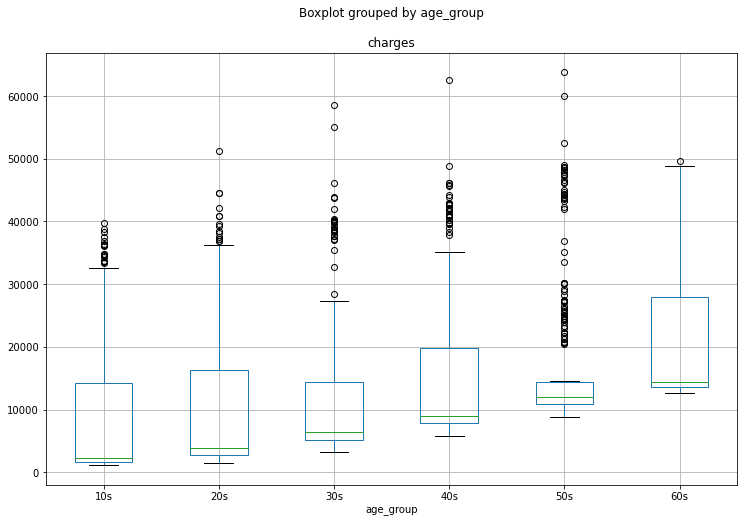

In [19]:
insurance.boxplot('charges', by='age_group', figsize=(12, 8))

In [20]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [21]:
aov = ols('charges ~ age_group', data = insurance).fit()
aov_table = sm.stats.anova_lm(aov, typ = 2 )
aov_table

,sum_sq,df,F,PR(>F)
age_group,17445900957.101,5.000,26.018,0.000
Residual,178628320611.267,1332.000,NaN,NaN


In [22]:
pair_t = aov.t_test_pairwise('age_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
20s-10s,1092.543,1135.895,0.962,0.336,-1135.795,3320.880,0.336,False
30s-10s,2925.826,1153.115,2.537,0.011,663.707,5187.946,0.044,True
40s-10s,6068.561,1133.625,5.353,0.000,3844.675,8292.447,0.000,True
50s-10s,8348.810,1146.264,7.283,0.000,6100.131,10597.490,0.000,True
60s-10s,12349.681,1510.480,8.176,0.000,9386.503,15312.859,0.000,True
30s-20s,1833.283,1002.100,1.829,0.068,-132.582,3799.149,0.131,False
40s-20s,4976.018,979.610,5.080,0.000,3054.270,6897.765,0.000,True
50s-20s,7256.267,994.209,7.299,0.000,5305.882,9206.653,0.000,True
60s-20s,11257.138,1398.599,8.049,0.000,8513.442,14000.834,0.000,True
40s-30s,3142.734,999.527,3.144,0.002,1181.916,5103.553,0.010,True


In [23]:
tukey = pairwise_tukeyhsd(endog=insurance['charges'],
                          groups=insurance['age_group'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   10s    20s  1092.5429    0.9 -2149.1151  4334.2009  False
   10s    30s  2925.8262 0.1143  -364.9756   6216.628  False
   10s    40s  6068.5607  0.001  2833.3787  9303.7426   True
   10s    50s  8348.8104  0.001  5077.5598 11620.0609   True
   10s    60s  12349.681  0.001   8039.019  16660.343   True
   20s    30s  1833.2834 0.4489 -1026.5457  4693.1125  False
   20s    40s  4976.0178  0.001  2180.3697  7771.6658   True
   20s    50s  7256.2675  0.001  4418.9579 10093.5771   True
   20s    60s 11257.1381  0.001  7265.7658 15248.5104   True
   30s    40s  3142.7344  0.021   290.2481  5995.2207   True
   30s    50s  5422.9841  0.001  2529.6546  8316.3137   True
   30s    60s  9423.8547  0.001  5392.4675 13455.2419   True
   40s    50s  2280.2497 0.1947  -549.6587  5110.1581  False
   40s    60s  6281.1203

<img src="images/tukey_age & charges.png" width=600 />

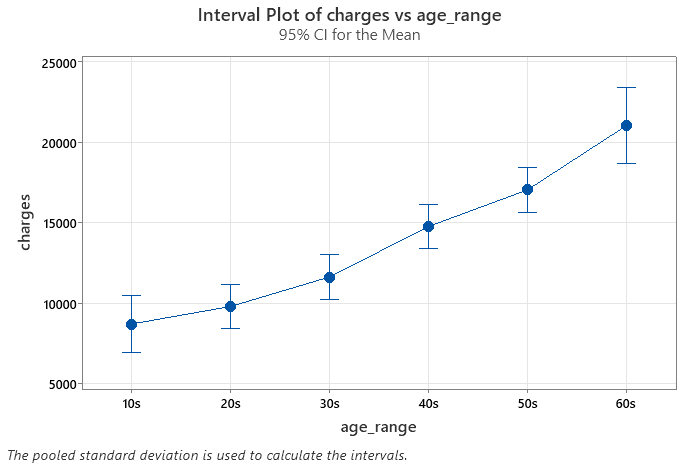

It show that there are **strong** significant difference between the levels of the age group since the p-value is 0 (<0.05)  

Age 10s-30s, 40s-50s, over 60 are in the different group.

* ANOVA test between Sex and Charges

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

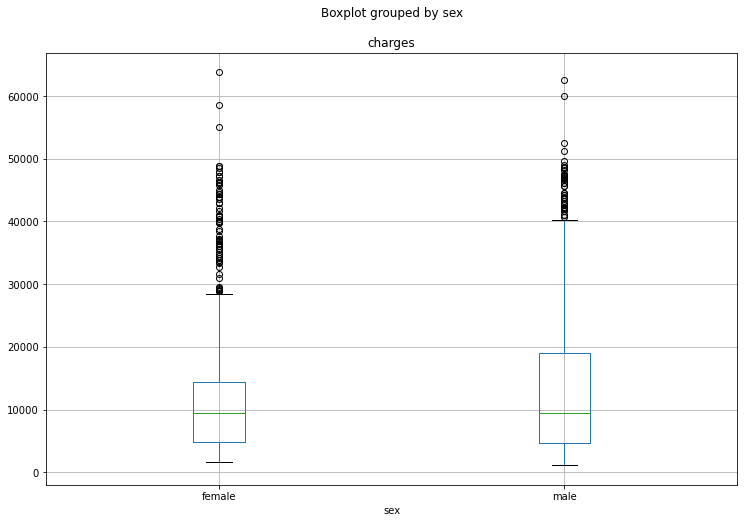

In [24]:
insurance.boxplot('charges', by='sex', figsize=(12, 8))

In [25]:
aov = ols('charges ~ sex', data = insurance).fit()
aov_table = sm.stats.anova_lm(aov, typ = 2 )
aov_table

,sum_sq,df,F,PR(>F)
sex,643590180.127,1.000,4.400,0.036
Residual,195430631388.240,1336.000,NaN,NaN


In [26]:
pair_t = aov.t_test_pairwise('sex')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
male-female,1387.172,661.331,2.098,0.036,89.812,2684.532,0.036,True


In [27]:
tukey = pairwise_tukeyhsd(endog=insurance['charges'],
                          groups=insurance['sex'],
                          alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj   lower    upper   reject
-------------------------------------------------------
female   male 1387.1723 0.0361 89.8123 2684.5324   True
-------------------------------------------------------


<img src="tukey_sex & charges.png" width=600 />

<img src="images/interval plot between sex and charges.png" width=600 />

It seems that there are **marginally** significant difference between the female and male sine the p-value is 0.036 (<0.05).

* ANOVA test between BMI range and Charges

<AxesSubplot:title={'center':'charges'}, xlabel='bmi_group'>

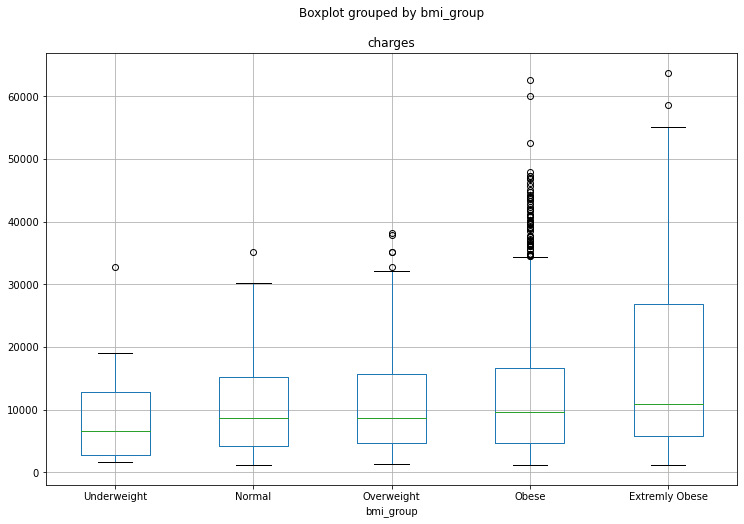

In [28]:
insurance.boxplot('charges', by='bmi_group', figsize=(12, 8))

In [29]:
aov = ols('charges ~ bmi_group', data = insurance).fit()
aov_table = sm.stats.anova_lm(aov, typ = 2 )
aov_table

,sum_sq,df,F,PR(>F)
bmi_group,9066684534.326,4.000,16.157,0.000
Residual,187007537034.041,1333.000,NaN,NaN


In [30]:
pair_t = aov.t_test_pairwise('bmi_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Normal-Underweight,1777.820,2702.086,0.658,0.511,-3522.983,7078.623,0.761,False
Overweight-Underweight,2340.183,2654.046,0.882,0.378,-2866.378,7546.745,0.759,False
Obese-Underweight,5771.800,2653.518,2.175,0.030,566.275,10977.326,0.114,False
Extremly Obese-Underweight,8296.203,2669.170,3.108,0.002,3059.971,13532.435,0.011,True
Overweight-Normal,562.363,992.070,0.567,0.571,-1383.825,2508.552,0.761,False
Obese-Normal,3993.980,990.656,4.032,0.000,2050.565,5937.396,0.000,True
Extremly Obese-Normal,6518.383,1031.850,6.317,0.000,4494.157,8542.609,0.000,True
Obese-Overweight,3431.617,850.936,4.033,0.000,1762.298,5100.937,0.000,True
Extremly Obese-Overweight,5956.020,898.557,6.628,0.000,4193.279,7718.760,0.000,True
Extremly Obese-Obese,2524.403,896.996,2.814,0.005,764.724,4284.081,0.025,True


In [31]:
tukey = pairwise_tukeyhsd(endog=insurance['charges'],
                          groups=insurance['bmi_group'],
                          alpha=0.05)
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
    group1        group2    meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------------------
Extremly Obese      Normal -6518.3829  0.001  -9336.8874 -3699.8784   True
Extremly Obese       Obese -2524.4026 0.0397  -4974.5547   -74.2504   True
Extremly Obese  Overweight -5956.0197  0.001  -8410.4359 -3501.6036   True
Extremly Obese Underweight  -8296.203 0.0165 -15587.0604 -1005.3455   True
        Normal       Obese  3993.9803  0.001   1287.9954  6699.9653   True
        Normal  Overweight   562.3632    0.9  -2147.4833  3272.2096  False
        Normal Underweight -1777.8201    0.9  -9158.5864  5602.9462  False
         Obese  Overweight -3431.6172  0.001   -5755.955 -1107.2794   True
         Obese Underweight -5771.8004 0.1897 -13019.9029  1476.3021  False
    Overweight Underweight -2340.1832    0.9  -9589.7282  4909.3617  False
-------------------------

<img src="images/tukey bmi & charges.png" width=600 />

<img src="images/interval plot between bmi group and charges.png" width=600 />

It show that there are **strong** significant difference between the levels of the bmi group since the p-value is 0 (<0.05)  

BMI group Underweight to Overweight, Obese, Extremly Obese are in the different group.

* ANOVA test between Childern categorical and Charges

<AxesSubplot:title={'center':'charges'}, xlabel='childern_categorical'>

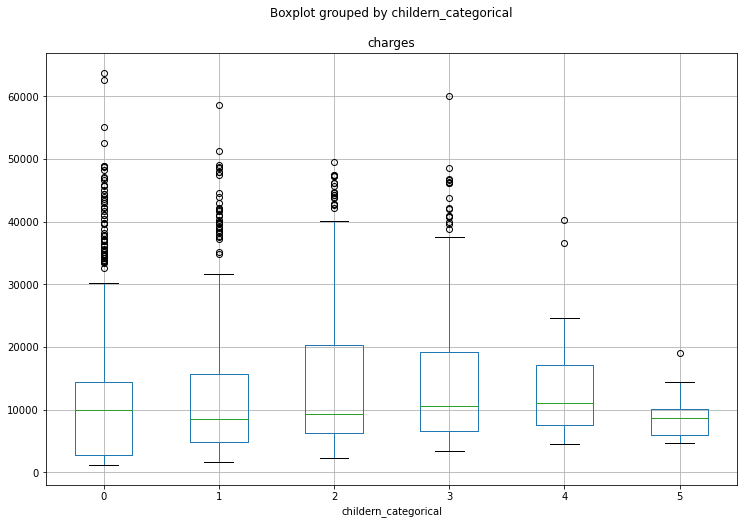

In [32]:
insurance.boxplot('charges', by='childern_categorical', figsize=(12, 8))

In [33]:
aov = ols('charges ~ childern_categorical', data = insurance).fit()
aov_table = sm.stats.anova_lm(aov, typ = 2 )
aov_table

,sum_sq,df,F,PR(>F)
childern_categorical,2396916712.520,5.000,3.297,0.006
Residual,193677304855.847,1332.000,NaN,NaN


In [34]:
pair_t = aov.t_test_pairwise('childern_categorical')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
1-0,365.196,837.909,0.436,0.663,-1278.569,2008.962,0.991,False
2-0,2707.588,926.911,2.921,0.004,889.224,4525.952,0.052,False
3-0,2989.343,1086.026,2.753,0.006,858.835,5119.850,0.081,False
4-0,1484.681,2463.626,0.603,0.547,-3348.328,6317.690,0.991,False
5-0,-3579.940,2886.396,-1.240,0.215,-9242.318,2082.437,0.822,False
2-1,2342.392,1026.949,2.281,0.023,327.779,4357.005,0.258,False
3-1,2624.147,1172.566,2.238,0.025,323.868,4924.425,0.266,False
4-1,1119.484,2502.980,0.447,0.655,-3790.729,6029.698,0.991,False
5-1,-3945.137,2920.058,-1.351,0.177,-9673.551,1783.278,0.822,False
3-2,281.755,1237.733,0.228,0.820,-2146.364,2709.874,0.991,False


In [35]:
tukey = pairwise_tukeyhsd(endog=insurance['charges'],
                          groups=insurance['childern_categorical'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper   reject
------------------------------------------------------------
     0      1   365.1962    0.9  -2026.0598 2756.4522  False
     0      2  2707.5881 0.0413     62.3365 5352.8398   True
     0      3  2989.3428 0.0662   -109.9976 6088.6831  False
     0      4  1484.6807    0.9  -5546.1043 8515.4657  False
     0      5 -3579.9404 0.7925 -11817.2428 4657.3621  False
     1      2  2342.3919 0.2025   -588.3514 5273.1352  False
     1      3  2624.1465 0.2211   -722.1665 5970.4596  False
     1      4  1119.4845    0.9  -6023.6128 8262.5817  False
     1      5 -3945.1366 0.7286 -12278.5064 4388.2332  False
     2      3   281.7546    0.9  -3250.5338 3814.0431  False
     2      4 -1222.9074    0.9  -8454.9949   6009.18  False
     2      5 -6287.5285 0.2705 -14697.3027 2122.2458  False
     3      4 -1504.6621    0.9  -8914.9012  5905.577  False
     3      5 -6569.2831

<img src="images/tukey childern & charges.png" width=600 />

<img src="images/interval plot between childern and charges.png" width=600 />

It show that there are significant difference between the levels of the bmi group since the p-value is 0.006 (<0.05)
It seems that the beneficiary with no childern and the one with two childern has significant difference. 

* ANOVA test between Smoker and Charges

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

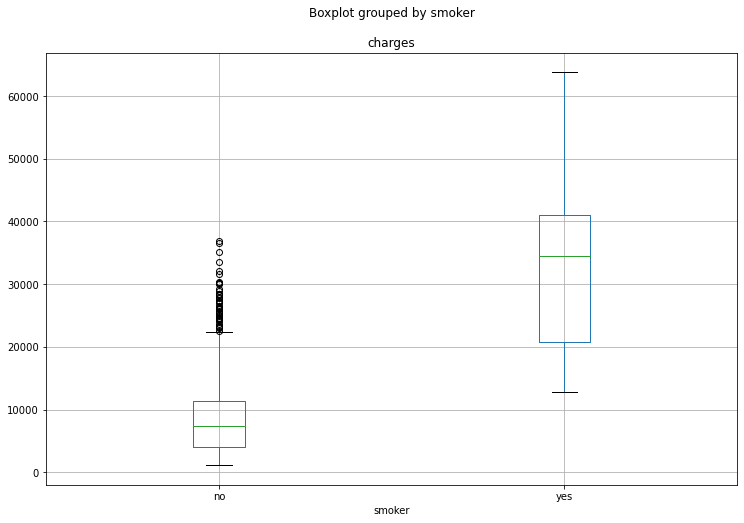

In [36]:
insurance.boxplot('charges', by='smoker', figsize=(12, 8))

In [37]:
aov = ols('charges ~ smoker', data = insurance).fit()
aov_table = sm.stats.anova_lm(aov, typ = 2 )
aov_table

,sum_sq,df,F,PR(>F)
smoker,121519903621.667,1.000,2177.615,0.000
Residual,74554317946.700,1336.000,NaN,NaN


In [38]:
pair_t = aov.t_test_pairwise('smoker')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
yes-no,23615.964,506.075,46.665,0.000,22623.175,24608.752,0.000,True


In [39]:
tukey = pairwise_tukeyhsd(endog=insurance['charges'],
                          groups=insurance['smoker'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    no    yes 23615.9635 0.001 22623.1748 24608.7523   True
-----------------------------------------------------------


<img src="images/tukey_smoker & charges.png" width=600 />

<img src="images/interval plot between smoker and charges.png" width=600 />

It show that there are **strong** significant difference between smoker and non-smoker group since the p-value is 0 (<0.05)

* ANOVA test between Region and Charges

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

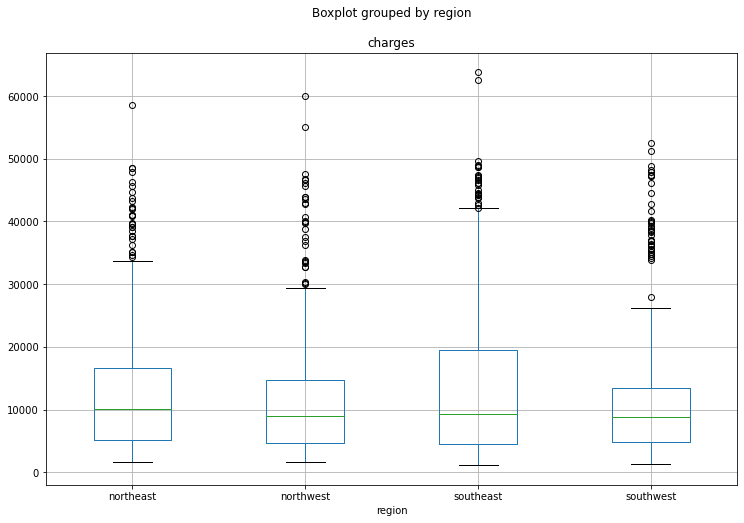

In [40]:
insurance.boxplot('charges', by='region', figsize=(12, 8))

In [41]:
aov = ols('charges ~ region', data = insurance).fit()
aov_table = sm.stats.anova_lm(aov, typ = 2 )
aov_table

,sum_sq,df,F,PR(>F)
region,1300759681.310,3.000,2.970,0.031
Residual,194773461887.057,1334.000,NaN,NaN


In [42]:
pair_t = aov.t_test_pairwise('region')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
northwest-northeast,-988.809,948.626,-1.042,0.297,-2849.771,872.153,0.602,False
southeast-northeast,1329.027,922.907,1.440,0.150,-481.480,3139.534,0.478,False
southwest-northeast,-1059.447,948.626,-1.117,0.264,-2920.409,801.515,0.602,False
southeast-northwest,2317.836,922.156,2.513,0.012,508.803,4126.869,0.059,False
southwest-northwest,-70.638,947.895,-0.075,0.941,-1930.165,1788.889,0.941,False
southwest-southeast,-2388.474,922.156,-2.590,0.010,-4197.507,-579.441,0.057,False


In [43]:
tukey = pairwise_tukeyhsd(endog=insurance['charges'],
                          groups=insurance['region'],
                          alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7002 -3428.9473  1451.329  False
northeast southeast  1329.0269 0.4754 -1044.9543 3703.0081  False
northeast southwest -1059.4471 0.6584 -3499.5853  1380.691  False
northwest southeast  2317.8361 0.0583    -54.212 4689.8842  False
northwest southwest    -70.638    0.9 -2508.8955 2367.6195  False
southeast southwest -2388.4741 0.0477 -4760.5221   -16.426   True
-----------------------------------------------------------------


<img src="images/tukey_region & charges.png" width=600 />

<img src="images/interval plot between region and charges.png" width=600 />

It show that there are **marginaly** significant difference between the place of residence since the p-value is 0.031 (<0.05)
It seems that the beneficiary residing at southeast and the one living at southwest has significant difference. 